In [1630]:
import vk
version = 5.103
myid = 82323061
app_id = 6035581

In [1631]:
import json

with open('secret_info.json', 'r') as f:
    secret_info = json.load(f)

In [1632]:
session = vk.AuthSession(app_id, secret_info.get('login'), secret_info.get('password'))

In [1633]:
vk_api = vk.API(session)

In [1634]:
my_friends_ids = vk_api.friends.get(v=version)['items']
my_friends_ids = [str(item) for item in my_friends_ids]
my_friends_ids[:3]

['409037', '553491', '666325']

In [1635]:
from progressbar import progressbar as pb
import networkx as nx
from time import sleep
graph = {}
problems = []

for friend_id in pb(my_friends_ids):
    sleep(0.3)
    try:
        friends_lst = vk_api.friends.get(v=version, user_id=friend_id)['items']
        graph[str(friend_id)] = [str(idd) for idd in friends_lst]
    except:
        problems.append(friend_id)
        
for p in problems:
    my_friends_ids.remove(p)

100% (536 of 536) |######################| Elapsed Time: 0:03:08 Time:  0:03:08


In [1637]:
from matplotlib import pyplot as plt
g = nx.Graph(directed=False)

for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in my_friends_ids and j in my_friends_ids:
            g.add_edge(i, j)


## Largest connected component

In [1638]:
cc_nodes = max(nx.connected_components(g), key=len)
g_cc = g.subgraph(cc_nodes)
nx.write_adjlist(g_cc,"friends_graph_connected.adjlist")
len(g_cc.nodes())

388

In [1627]:
g_cc_coords = nx.kamada_kawai_layout(g_cc)

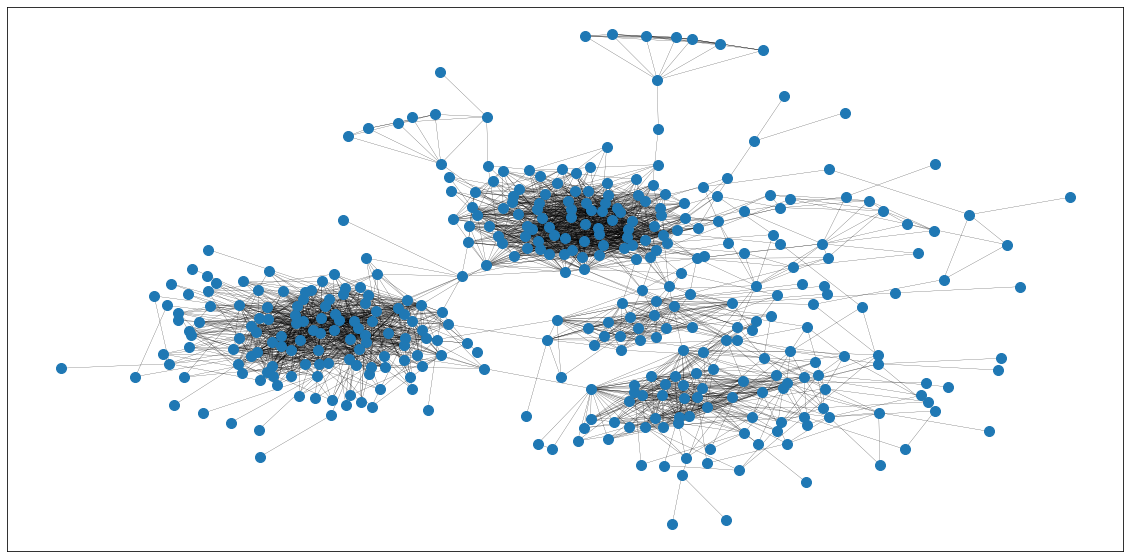

In [1628]:
plt.figure(figsize=(20,10))
nx.draw_networkx(g_cc, pos=g_coords, node_size=100, with_labels=False, width=0.2)
#nx.write_adjlist(g,"friends_graph.adjlist")

## Nodes number

In [1645]:
len(g_cc.nodes)

388

## Edges number

In [1659]:
len(g_cc.edges)

2885

## Degree Distribution

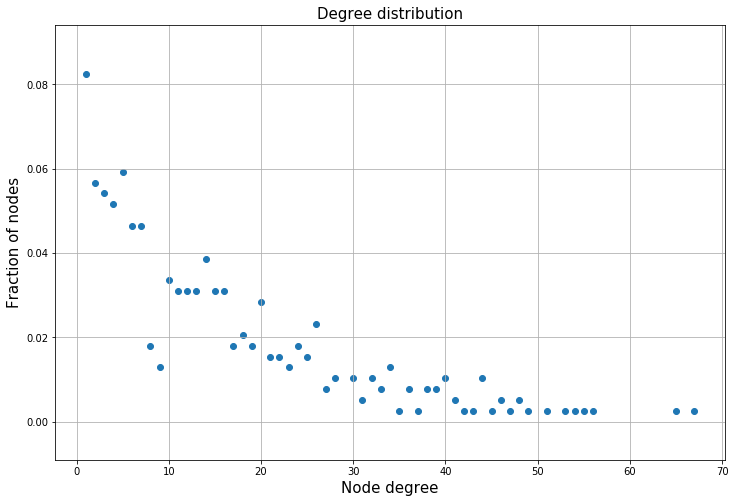

In [1661]:
degrees = [g_cc.degree(n) for n in g_cc.nodes()]
distrib = dict(Counter(degrees))

for key in distrib.keys():
    distrib[key] = distrib[key] / len(g_cc.nodes())
fig = plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(distrib.keys(), distrib.values())
plt.xlabel('Node degree', fontsize=15)
plt.ylabel('Fraction of nodes', fontsize=15)
plt.title('Degree distribution', fontsize=15)
plt.show()

In [1662]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('visualizations/degree_distribution.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

## Get friends info

In [1646]:
def process_sex(n):
    if n == 0:
        return None
    elif n == 1:
        return 'Женский'
    else:
        return 'Мужской'
    
def process_uni(uni_info):
    if uni_info is None:
        return 0
    for item in uni_info:
        if item['id'] == 128:
            return 1
    return 0
    
friends_info = {}

for idd, value in pb(graph.items()):
    vk_info = vk_api.users.get(v=version, user_id=int(idd), fields='sex, city, universities')[0]
    city = vk_info.get('city')
    city = None if city is None else city.get('title')
    
    
    friends_info[str(idd)] = {
            'name': vk_info['first_name'] + ' ' + vk_info['last_name'],
            'sex': process_sex(vk_info.get('sex')),
            'city': city,
            'in_hse': process_uni(vk_info.get('universities'))
        }
    sleep(0.3)


100% (449 of 449) |######################| Elapsed Time: 0:02:38 Time:  0:02:38


## Wylsacom group

In [1648]:
wylsa_info = vk_api.groups.getMembers(v=version, group_id=31038184, filter='friends')['items']
len(wylsa_info)

99

In [1649]:
for key in friends_info.keys():
    if int(key) in wylsa_info:
        friends_info[key].update({'in_wylsa': 1})
    else:
        friends_info[key].update({'in_wylsa': 0})

In [1660]:
friends_info["2182236"]

{'name': 'Андрей Поляков',
 'sex': 'Мужской',
 'city': 'Москва',
 'in_hse': 0,
 'in_wylsa': 0}

In [1650]:
import json
with open('friends_info.json', 'w') as json_file:
    json.dump(friends_info, json_file, ensure_ascii=False, indent=4)

In [812]:
from pyecharts.charts import Graph
from networkx.readwrite import json_graph
from pyecharts import options as opts

## Largest Connected component

In [1663]:
len(g_cc.nodes())

388

In [1664]:
len(g_cc.edges())

2885

In [1665]:
def process_friend(item):
    result = str(item)[1:-1]
    result = result.title()
    result = result.replace(', ', ' | ').replace("'", "")
    return result
    
        
print(process_friend(friends_info['99206816']))

Name: Евгений Волков | Sex: Мужской | City: Москва | In_Hse: 0 | In_Wylsa: 0


In [1666]:
g_cc_coords["118589296"] = np.array([-0.25, 0.82])
g_cc_coords["89515615"] = np.array([-0.15, 1.0])
g_cc_coords["23093625"] = np.array([-0.15, 0.86])
g_cc_coords["382052697"] = np.array([-0.2558, 0.95])
g_cc_coords["7037183"] = np.array([-0.075, 0.88])
g_cc_coords["38007014"] = np.array([0.021, 0.88])
g_cc_coords["65013816"] = np.array([-0.093, 0.76])
g_cc_coords["59808904"] = np.array([-0.473, 0.4])
g_cc_coords["8908779"] = np.array([-0.48, 0.57])
g_cc_coords["5899293"] = np.array([-0.426, 0.3])

In [1668]:
g_data = json_graph.node_link_data(g_cc)
g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': '#149588'
                        }
                      }
                    }
                   
                   for item in g_cc.nodes()]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1920px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(title_opts=opts.TitleOpts(title='VK Friends Graph'),
                      legend_opts=opts.LegendOpts(is_show=True))
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends.html'

## node size ~ node degree

In [1669]:
def norm_node_size(x, l_bound, r_bound):
    a = (r_bound - l_bound) / 67
    b = l_bound - a
    return a * x + b

In [1670]:
norm_node_size(68, 5, 40)

40.0

In [1671]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": norm_node_size(degrees[item], 10, 40),
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': '#149588'
                        }
                      }
                    }
                   
                   for item in g_cc.nodes()]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1920px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends_degree.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends_degree.html'

# 1

## Radius

In [1672]:
from networkx.algorithms.distance_measures import radius

g_cc_radius = radius(g_cc)
g_cc_radius

6

## Diameter

In [1673]:
from networkx.algorithms.distance_measures import diameter

g_cc_diameter = diameter(g_cc)
g_cc_diameter

10

##  Average shortest path

In [1674]:
nx.average_shortest_path_length(g_cc)

4.103119422467301

## Average custering coefficient

In [1675]:
nx.average_clustering(g_cc)

0.44897011125993574

## Average node degree

In [1676]:
degrees = dict(g_cc.degree())
sum(degrees.values()) / len(degrees.keys())

14.871134020618557

# 2

## Degree centrality

In [1677]:
import operator

degree_cent = nx.degree_centrality(g_cc)

degree_cent = sorted(degree_cent.items(), key=operator.itemgetter(1), reverse=True)
degree_cent = [(item[0], friends_info[item[0]]['name'], item[1]) for item in degree_cent]
top10_degree_cent = [item[0] for item in degree_cent[:10]]
degree_cent[:10]

[('23550099', 'Александр Ермачков', 0.17312661498708012),
 ('144815055', 'Pavel )))', 0.16795865633074936),
 ('257350143', 'Georgiy Demenchuk', 0.144702842377261),
 ('154736489', 'Валерий Батурин', 0.1421188630490956),
 ('317187625', 'Денис Тарасов', 0.13953488372093023),
 ('11094314', 'Антон Наумов', 0.13695090439276486),
 ('26484449', 'Лера Стоева', 0.13178294573643412),
 ('38005894', 'Денис Шаклеин', 0.12661498708010335),
 ('50489710', 'Максимилиан Артемьев', 0.12403100775193798),
 ('71191598', 'Гера Войнов', 0.12403100775193798)]

In [1678]:
degree_cent_colors = {}

for item in g_cc.nodes():
    if item in top10_degree_cent:
        degree_cent_colors[item] = None
    else:
        degree_cent_colors[item] = '#149588'

In [1679]:
special_sort = deepcopy(list(g_cc.nodes()))
for item in top10_degree_cent:
    special_sort.remove(item)
special_sort.extend(top10_degree_cent)

In [1681]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": norm_node_size(degrees[item], 10, 40),
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': degree_cent_colors[item]
                        }
                      }
                    }
                   
                   for item in special_sort]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1920px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends_degree_centrality.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends_degree_centrality.html'

## Closeness centrality

In [1682]:
close_cent = nx.closeness_centrality(g_cc)

close_cent = sorted(close_cent.items(), key=operator.itemgetter(1), reverse=True)
close_cent = [(item[0], friends_info[item[0]]['name'], item[1]) for item in close_cent]
top10_close_cent = [item[0] for item in close_cent[:10]]
close_cent[:10]

[('228165397', 'Христофор Парфиров', 0.33799126637554583),
 ('22304277', 'Александр Проскуряков', 0.33652173913043476),
 ('137834869', 'Стас Рыбин', 0.3333333333333333),
 ('40753584', 'Ксения Жилкина', 0.32603201347935973),
 ('206556191', 'Михаил Флоринский', 0.3193069306930693),
 ('47549624', 'Антон Таныгин', 0.3193069306930693),
 ('50489710', 'Максимилиан Артемьев', 0.31669394435351883),
 ('53504639', 'Алексей Соловьёв', 0.31009615384615385),
 ('218999229', 'Денис Самохвалов', 0.30861244019138756),
 ('26484449', 'Лера Стоева', 0.30861244019138756)]

In [1683]:
close_cent_size = {}

for item in close_cent:
    close_cent_size[item[0]] = int(item[2]*100)

In [1684]:
close_cent_colors = {}

for item in g_cc.nodes():
    if item in top10_close_cent:
        close_cent_colors[item] = None
    else:
        close_cent_colors[item] = '#149588'

In [1685]:
special_sort = deepcopy(list(g_cc.nodes()))
for item in top10_close_cent:
    special_sort.remove(item)
special_sort.extend(top10_close_cent)

In [1686]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": int(30/19 * close_cent_size[item]  + 10 - 420/19),
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': close_cent_colors[item]
                        }
                      }
                    }
                   
                   for item in special_sort]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1920px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends_close_centrality.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends_close_centrality.html'

## Betweeness centrality

In [1687]:
betw_cent = nx.betweenness_centrality(g_cc)

betw_cent = sorted(betw_cent.items(), key=operator.itemgetter(1), reverse=True)
betw_cent = [(item[0], friends_info[item[0]]['name'], item[1]) for item in betw_cent]
top10_betw_cent = [item[0] for item in betw_cent[:10]]
betw_cent[:10]

[('228165397', 'Христофор Парфиров', 0.18385171030834693),
 ('137834869', 'Стас Рыбин', 0.1514665031154356),
 ('241028616', 'Степан Куртев', 0.14087940400521712),
 ('290011953', 'Cjb Bot', 0.12845854329600392),
 ('47549624', 'Антон Таныгин', 0.093320510668631),
 ('89041431', 'Андрей Парницкий', 0.08731378619962918),
 ('666325', 'Инга Балан', 0.08278936553819102),
 ('144815055', 'Pavel )))', 0.08239366092666087),
 ('22304277', 'Александр Проскуряков', 0.07721352988574275),
 ('21629242', 'Джульета Мурадян', 0.054045489667251846)]

In [1688]:
import math

betw_cent_size = {}

for item in betw_cent:
    betw_cent_size[item[0]] = round(item[2]*100)

In [1689]:
betw_cent_colors = {}

for item in g_cc.nodes():
    if item in top10_betw_cent:
        betw_cent_colors[item] = None
    else:
        betw_cent_colors[item] = '#149588'

In [1690]:
special_sort = deepcopy(list(g_cc.nodes()))
for item in top10_betw_cent:
    special_sort.remove(item)
special_sort.extend(top10_betw_cent)

In [1691]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": int(30/19 * betw_cent_size[item] + 10),
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': betw_cent_colors[item]
                        }
                      }
                    }
                   
                   for item in special_sort]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1080px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends_betweenness_centrality.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends_betweenness_centrality.html'

## Pagerank

In [1692]:
pagerank_cent = nx.pagerank(g_cc)

pagerank_cent = sorted(pagerank_cent.items(), key=operator.itemgetter(1), reverse=True)
pagerank_cent = [(item[0], friends_info[item[0]]['name'], item[1]) for item in pagerank_cent]
top10_pagerank_cent = [item[0] for item in pagerank_cent[:10]]
pagerank_cent[:10]

[('23550099', 'Александр Ермачков', 0.009805985303079186),
 ('144815055', 'Pavel )))', 0.009503912904443645),
 ('257350143', 'Georgiy Demenchuk', 0.007895072431971219),
 ('241028616', 'Степан Куртев', 0.006829600846242718),
 ('146821922', 'Андрей Быстрицкий', 0.006691053734843005),
 ('71191598', 'Гера Войнов', 0.0066238535866609445),
 ('228165397', 'Христофор Парфиров', 0.006454148446240703),
 ('155512704', 'Алексей Ушаков', 0.006412180403780547),
 ('139219901', 'Кирилл Громыко', 0.006311505087357771),
 ('154736489', 'Валерий Батурин', 0.006283324399438959)]

In [1693]:
import math

pagerank_cent_size = {}

for item in pagerank_cent:
    pagerank_cent_size[item[0]] = round(item[2]*1000)

In [1694]:
pagerank_cent_colors = {}

for item in g_cc.nodes():
    if item in top10_pagerank_cent:
        pagerank_cent_colors[item] = None
    else:
        pagerank_cent_colors[item] = '#149588'

In [1695]:
special_sort = deepcopy(list(g_cc.nodes()))
for item in top10_pagerank_cent:
    special_sort.remove(item)
special_sort.extend(top10_pagerank_cent)

In [1696]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": int(30/9 * pagerank_cent_size[item] + 10 - 30/9),
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': pagerank_cent_colors[item]
                        }
                      }
                    }
                   
                   for item in special_sort]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1080px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends_pagerank_centrality.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends_pagerank_centrality.html'

## Assortativity coefficient

In [1697]:
nx.set_node_attributes(g_cc, friends_info)

In [1698]:
nx.attribute_assortativity_coefficient(g_cc, 'city')

0.10655190815423547

In [1699]:
nx.attribute_assortativity_coefficient(g_cc, 'in_hse')

0.39427148785033433

In [1700]:
nx.attribute_assortativity_coefficient(g_cc, 'in_wylsa')

0.1999848744580012

In [1701]:
nx.attribute_assortativity_coefficient(g_cc, 'sex')

0.2455530003536551

In [1702]:
nx.degree_assortativity_coefficient(g_cc)

0.13000234524955237

## Adjacency matrix

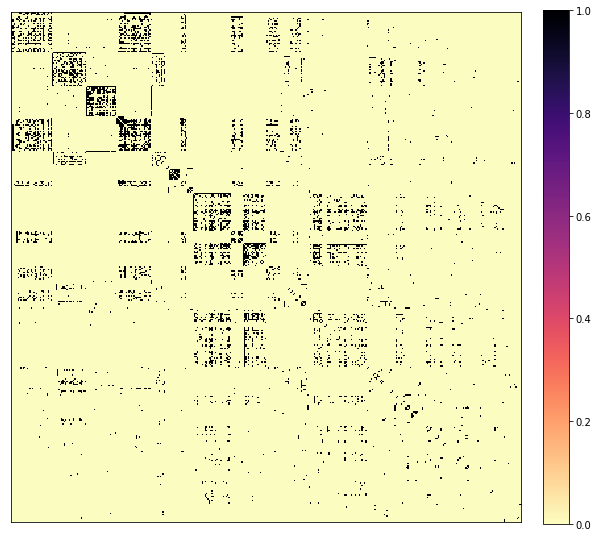

In [1703]:
from matplotlib import pyplot as plt

g_adj = nx.adjacency_matrix(g_cc, nodelist=g_cc.nodes()).toarray()
f = plt.figure(figsize=(10,10))
plt.matshow(g_adj, fignum=f.number, cmap='magma_r')
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(fraction=0.046, pad=0.04)

pp = PdfPages('visualizations/sim_adj.pdf', keep_empty=False)
pp.savefig(f)
pp.close()

## Cosine Similarity between nodes

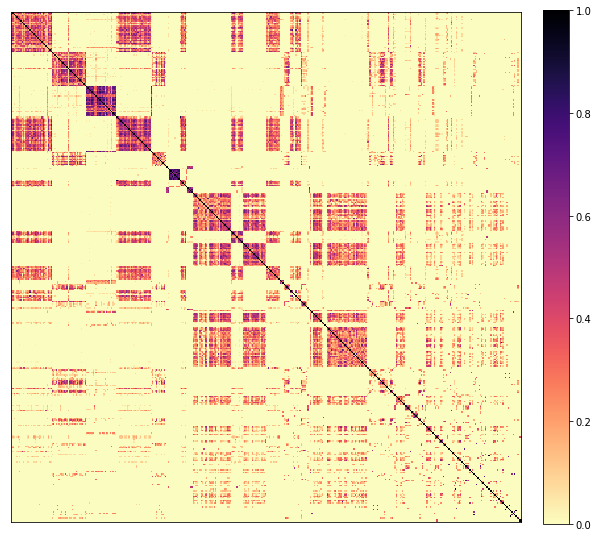

In [1704]:
from sklearn.metrics.pairwise import cosine_similarity as cos

g_cosine = cos(g_adj)
f = plt.figure(figsize=(10,10))
plt.matshow(g_cosine, fignum=f.number, cmap='magma_r')
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(fraction=0.046, pad=0.04)

pp = PdfPages('visualizations/sim_cos.pdf', keep_empty=False)
pp.savefig(f)
pp.close()

In [1705]:
cos_dict = {}
for i in range(len(g_cosine)):
    for j in range(len(g_cosine)):
        if i > j:
            cos_dict[(i,j)] = g_cosine[i,j]
            
sorted_cos_dict = sorted(cos_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_cos_dict[:10]

[((125, 122), 1.0000000000000002),
 ((362, 337), 1.0),
 ((363, 337), 1.0),
 ((363, 362), 1.0),
 ((378, 375), 1.0),
 ((383, 379), 1.0),
 ((387, 386), 1.0),
 ((123, 121), 0.9128709291752769),
 ((127, 123), 0.9128709291752769),
 ((128, 80), 0.8944271909999159)]

## Jaccard Similarity between nodes

In [1706]:
from __future__ import division

def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = intrsct / unions
    return dist

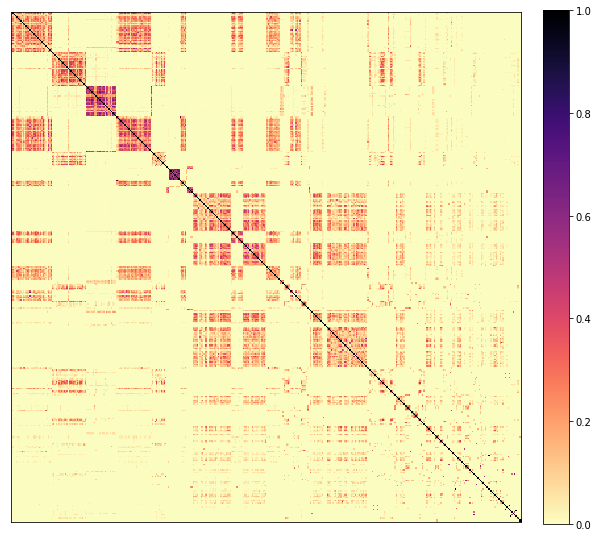

In [1707]:
g_jac = pairwise_jaccard(g_adj)
f = plt.figure(figsize=(10,10))
plt.matshow(g_jac, fignum=f.number, cmap='magma_r')
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(fraction=0.046, pad=0.04)

pp = PdfPages('visualizations/sim_jac.pdf', keep_empty=False)
pp.savefig(f)
pp.close()

In [1708]:
jac_dict = {}
for i in range(len(g_jac)):
    for j in range(len(g_jac)):
        if i > j:
            jac_dict[(i,j)] = g_jac[i,j]
            
sorted_jac_dict = sorted(jac_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_jac_dict[:10]

[((125, 122), 1.0),
 ((362, 337), 1.0),
 ((363, 337), 1.0),
 ((363, 362), 1.0),
 ((378, 375), 1.0),
 ((383, 379), 1.0),
 ((387, 386), 1.0),
 ((123, 121), 0.8333333333333334),
 ((127, 123), 0.8333333333333334),
 ((128, 80), 0.8)]

## Pearson similarity between nodes

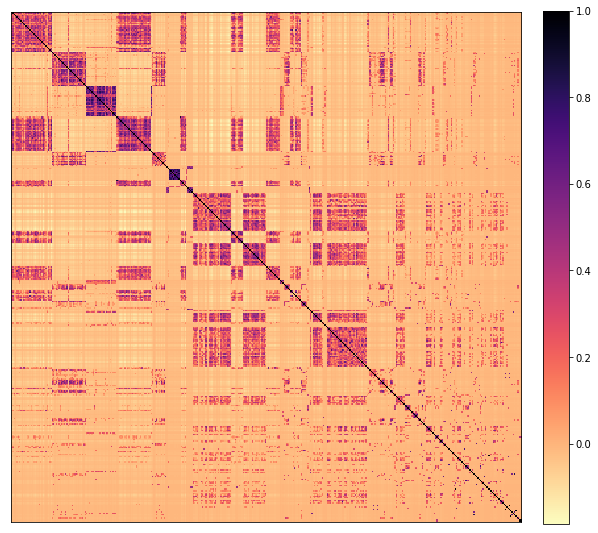

In [1709]:
g_pear = np.corrcoef(g_adj)
f = plt.figure(figsize=(10,10))
plt.matshow(g_pear, fignum=f.number, cmap='magma_r')
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(fraction=0.046, pad=0.04)

pp = PdfPages('visualizations/sim_pear.pdf', keep_empty=False)
pp.savefig(f)
pp.close()

In [1710]:
pear_dict = {}
for i in range(len(g_pear)):
    for j in range(len(g_pear)):
        if i > j:
            pear_dict[(i,j)] = g_jac[i,j]
            
sorted_pear_dict = sorted(pear_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_pear_dict[:10]

[((125, 122), 1.0),
 ((362, 337), 1.0),
 ((363, 337), 1.0),
 ((363, 362), 1.0),
 ((378, 375), 1.0),
 ((383, 379), 1.0),
 ((387, 386), 1.0),
 ((123, 121), 0.8333333333333334),
 ((127, 123), 0.8333333333333334),
 ((128, 80), 0.8)]

# Closest random graph

## My graph

In [1711]:
print('# Nodes:', len(g_cc.nodes()))
print('# Edges:', len(g_cc.edges()))

en_degrees = dict(g_cc.degree())
print('Average node degree:', sum(en_degrees.values()) / len(en_degrees.keys()))
print('Avegage shortest path:', nx.average_shortest_path_length(g_cc))
print('Average clustering coefficient:', nx.average_clustering(g_cc))
print('Diameter:', diameter(g_cc))

# Nodes: 388
# Edges: 2885
Average node degree: 14.871134020618557
Avegage shortest path: 4.103119422467301
Average clustering coefficient: 0.44897011125993574
Diameter: 10


## Erdos-Renyi

In [1715]:
from networkx.generators.random_graphs import gnp_random_graph

en_model = gnp_random_graph(388, 0.04, seed=5)

print('# Nodes:', len(en_model.nodes()))
print('# Edges:', len(en_model.edges()))

en_degrees = dict(en_model.degree())
print('Average node degree:', sum(en_degrees.values()) / len(en_degrees.keys()))
print('Avegage shortest_path:', nx.average_shortest_path_length(en_model))
print('Average clustering coefficient:', nx.average_clustering(en_model))
print('Diameter:', diameter(en_model))

# Nodes: 388
# Edges: 2903
Average node degree: 14.963917525773196
Avegage shortest_path: 2.500586057167213
Average clustering coefficient: 0.03813505382616851
Diameter: 4


## Watts Strogatz model

In [1718]:
from networkx.generators.random_graphs import watts_strogatz_graph

ws_model = watts_strogatz_graph(388, 15, 0.11, seed=5)
print('# Nodes:', len(ws_model.nodes()))
print('# Edges:', len(ws_model.edges()))

ws_degrees = dict(ws_model.degree())
print('Average node degree:', sum(ws_degrees.values()) / len(ws_degrees.keys()))
print('Avegage shortest path:', nx.average_shortest_path_length(ws_model))
print('Average clustering coefficient:', nx.average_clustering(ws_model))
print('Diameter:', diameter(ws_model))

# Nodes: 388
# Edges: 2716
Average node degree: 14.0
Avegage shortest path: 3.109392898052692
Average clustering coefficient: 0.4893438273706622
Diameter: 5


## Barabasi Albert model

In [1720]:
from networkx.generators.random_graphs import barabasi_albert_graph

ba_model = barabasi_albert_graph(388, 8, seed=5)
print('# Nodes:', len(ba_model.nodes()))
print('# Edges:', len(ba_model.edges()))

ba_degrees = dict(ba_model.degree())
print('Average node degree:', sum(ba_degrees.values()) / len(ba_degrees.keys()))
print('Avegage shortest path:', nx.average_shortest_path_length(ba_model))
print('Average clustering coefficient:', nx.average_clustering(ba_model))
print('Diameter:', diameter(ba_model))

# Nodes: 388
# Edges: 3040
Average node degree: 15.670103092783505
Avegage shortest path: 2.4001172114334426
Average clustering coefficient: 0.10435277995057551
Diameter: 4


# Cliques

In [1721]:
cliqs = list(nx.find_cliques(g_cc))
len(cliqs)

2218

In [1722]:
def find_max_list(lst):
    list_len = [len(i) for i in lst]
    print(max(list_len))

In [1723]:
from collections import Counter
cliqs_len = [len(cliq) for cliq in cliqs]
cliqs_len_dict = dict(Counter(cliqs_len))
cliqs_len_dict = sorted(cliqs_len_dict.items(), key=operator.itemgetter(0), reverse=True)
cliqs_len_dict

[(12, 7),
 (11, 28),
 (10, 133),
 (9, 224),
 (8, 305),
 (7, 374),
 (6, 381),
 (5, 335),
 (4, 185),
 (3, 136),
 (2, 110)]

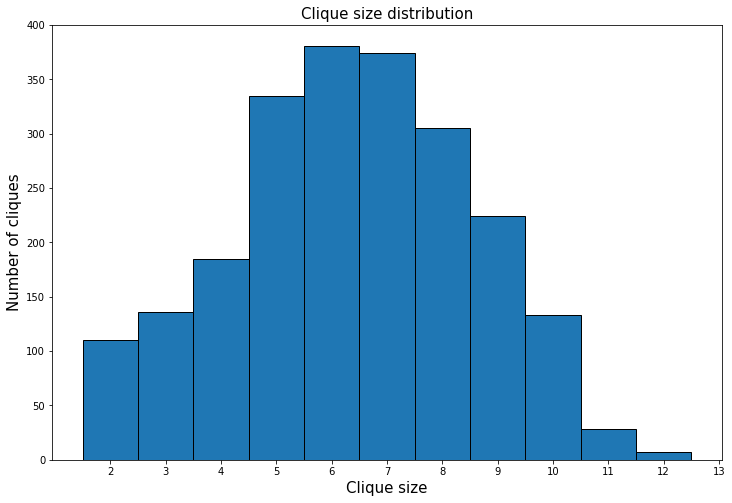

In [1724]:
bins = np.arange(2,14)

fig = plt.figure(figsize=(12,8))
plt.xticks(bins+.5, bins)
plt.xlabel('Clique size', fontsize=15)
plt.ylabel('Number of cliques', fontsize=15)
plt.hist(cliqs_len, bins=bins, edgecolor='black')
plt.title('Clique size distribution', fontsize=15)

pp = PdfPages('visualizations/clique_distrib.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

In [1725]:
big_cliqs, uniq_nodes = [], set()

for cliq in cliqs:
    if len(cliq) == 12:
        big_cliqs.append(cliq)
        uniq_nodes.update(cliq)
        
len(uniq_nodes)

20

In [1726]:
clique_1 = big_cliqs[0]

In [1727]:
clique_2 = big_cliqs[1]

## Clique 1 viz

In [1728]:
cliqs_colors = {}

for item in g_cc.nodes():
    if item in clique_1:
        cliqs_colors[item] = None
    else:
        cliqs_colors[item] = '#149588'
        
special_sort = deepcopy(list(g_cc.nodes()))
for item in clique_1:
    special_sort.remove(item)
special_sort.extend(list(clique_1))

In [1729]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": norm_node_size(degrees[item], 10, 40),
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': cliqs_colors[item]
                        }
                      }
                    }
                   
                   for item in special_sort]

for i, item in enumerate(g_data['links']):
    if item['source'] in clique_1 and item['target'] in clique_1:
        g_data['links'][i] = {"source": item['source'], 
                "target": item['target'],
                'lineStyle': {
                    "color": 'red',
                    "width": 5,
                    "emphasis":
                        {"width": 5
                         },
                    'curveness': 0.1,
                    'opacity': 0.8}
                   }
    else:
        g_data['links'][i] = {"source": item['source'], 
                "target": item['target'],
                'lineStyle': {
                    "emphasis":
                        {"width": 3
                         },
                    'curveness': 0.1,
                    'opacity': 0.8}
                   }

eg = Graph(init_opts=opts.InitOpts(width="1080px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends_cliqs_1.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends_cliqs_1.html'

## Clique 2 viz

In [1730]:
cliqs_colors = {}

for item in g_cc.nodes():
    if item in clique_2:
        cliqs_colors[item] = None
    else:
        cliqs_colors[item] = '#149588'
        
special_sort = deepcopy(list(g_cc.nodes()))
for item in clique_2:
    special_sort.remove(item)
special_sort.extend(list(clique_2))

In [1731]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": norm_node_size(degrees[item], 10, 40),
                    "value": [process_friend(friends_info[item])],
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                            'color': cliqs_colors[item]
                        }
                      }
                    }
                   
                   for item in special_sort]

for i, item in enumerate(g_data['links']):
    if item['source'] in clique_2 and item['target'] in clique_2:
        g_data['links'][i] = {"source": item['source'], 
                "target": item['target'],
                'lineStyle': {
                    "color": 'red',
                    "width": 5,
                    "emphasis":
                        {"width": 5
                         },
                    'curveness': 0.1,
                    'opacity': 0.8}
                   }
    else:
        g_data['links'][i] = {"source": item['source'], 
                "target": item['target'],
                'lineStyle': {
                    "emphasis":
                        {"width": 3
                         },
                    'curveness': 0.1,
                    'opacity': 0.8}
                   }

eg = Graph(init_opts=opts.InitOpts(width="1080px", height="1080px"))

eg.add('', nodes=g_data['nodes'], links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True))

path = 'visualizations/friends_cliqs_2.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/visualizations/friends_cliqs_2.html'

### Friends from cliques

In [1732]:
for item in uniq_nodes:
    print(friends_info[item].get('name'))

Андрей Соколов
Иван Толкушкин
Дмитрий Кириллов
Валерий Батурин
Илья Шубаев
Ксения Жилкина
Даша Чижова
Александр Цой
Сергей Павлов
Гектор Вереск
Денис Тарасов
Дарья Корепанова
Екатерина Докучаева
Астра Никитина
Антон Наумов
Денис Шаклеин
Юлия Ренёва
Оля Антонова
Pavel Хрушков
Виктория Тороп


## Community detection

In [794]:
import igraph

### Community fastgreedy

In [1567]:
g_cc_igraph = igraph.Graph.Adjacency(nx.to_numpy_matrix(g_cc).tolist(), mode=ADJ_UNDIRECTED)
dendrogram = g_cc_igraph.community_fastgreedy()

clusters = dendrogram.as_clustering()

In [1549]:
nodeid_to_ind = {nodeid: i for i, nodeid in enumerate(g_cc.nodes())}
ind_to_nodeid = {val:key for key, val in nodeid_to_ind.items()}

In [1550]:
categories = {}

for i, cluster in enumerate(clusters):
    for item in cluster:
        categories[ind_to_nodeid[item]] = i+1

In [1551]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": norm_node_size(degrees[item], 10, 40),
                    "value": [process_friend(friends_info[item])],
                    "category": str(categories[item]),
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                        }
                      }
                    }
                   
                   for item in g_cc.nodes()]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1080px", height="1080px"))

new_categories = [{'name': str(ind)} for ind in set(categories.values())]
eg.add('', nodes=g_data['nodes'], categories=new_categories, links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True, item_height=30, item_width=30))

path = 'visualizations/friends_fastgreedy.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/friends_connected_fastgreedy.html'

### Edge Betweenness

In [1562]:
g_cc_igraph = igraph.Graph.Adjacency(nx.to_numpy_matrix(g_cc).tolist(), mode=ADJ_UNDIRECTED)
dendrogram = g_cc_igraph.community_edge_betweenness(7, False)

clusters = dendrogram.as_clustering()

In [1560]:
categories = {}

for i, cluster in enumerate(clusters):
    for item in cluster:
        categories[ind_to_nodeid[item]] = i+1

In [1561]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": norm_node_size(degrees[item], 10, 40),
                    "value": [process_friend(friends_info[item])],
                    "category": str(categories[item]),
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                        }
                      }
                    }
                   
                   for item in g_cc.nodes()]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1080px", height="1080px"))

new_categories = [{'name': str(ind)} for ind in set(categories.values())]
eg.add('', nodes=g_data['nodes'], categories=new_categories, links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True, item_height=30, item_width=30))

path = 'visualizations/friends_edge_betweenness.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/friends_connected_edge_betweenness.html'

### WalkTrap

In [1545]:
g_cc_igraph = igraph.Graph.Adjacency(nx.to_numpy_matrix(g_cc).tolist(), mode=ADJ_UNDIRECTED)
dendrogram = g_cc_igraph.community_walktrap(steps=10)

clusters = dendrogram.as_clustering()

In [1546]:
categories = {}

for i, cluster in enumerate(clusters):
    for item in cluster:
        categories[ind_to_nodeid[item]] = i+1

In [1547]:
g_data = json_graph.node_link_data(g_cc)
degrees = g_cc.degree()

g_data['nodes'] = [{"name": item,
                    "x": g_cc_coords[item][0],
                    "y": g_cc_coords[item][1],
                    "symbolSize": norm_node_size(degrees[item], 10, 40),
                    "value": [process_friend(friends_info[item])],
                    "category": str(categories[item]),
                    "label": {
                        "textShadowColor": "#000",
                        "textShadowBlur": 60
                    },
                    "itemStyle": {
                        "normal": {
                            'borderColor': '#fff',
                            'borderWidth': 1,
                            'shadowBlur': 1,
                            'shadowColor': '#000',
                        }
                      }
                    }
                   
                   for item in g_cc.nodes()]

g_data['links'] = [{"source": item['source'], 
                    "target": item['target'],
                    'lineStyle': {
                        "emphasis":
                            {"width": 3
                             },
                        'curveness': 0.1,
                        'opacity': 0.8}
                   } for item in g_data['links']]

eg = Graph(init_opts=opts.InitOpts(width="1080px", height="1080px"))

new_categories = [{'name': str(ind)} for ind in set(categories.values())]
eg.add('', nodes=g_data['nodes'], categories=new_categories, links=g_data['links'], is_roam=True, edge_length=150,
      label_opts=opts.LabelOpts(is_show=False), repulsion=50, layout='none')
eg.set_global_opts(legend_opts=opts.LegendOpts(is_show=True, item_height=30, item_width=30))

path = 'visualizations/friends_walktrap.html'
eg.render(path)

'/Users/alex/Python/Mag1/Network Science/Proj/friends_connected_walktrap.html'

## Community comparison (by modularity)

In [1596]:
from networkx.algorithms.community.quality import modularity

### FastGreedy

In [1597]:
g_cc_igraph = igraph.Graph.Adjacency(nx.to_numpy_matrix(g_cc).tolist(), mode=ADJ_UNDIRECTED)
dendrogram = g_cc_igraph.community_fastgreedy()

clusters = dendrogram.as_clustering()

In [1598]:
clusters_sets = []

for clust in clusters:
    new_clust = set()
    for idd in clust:
        new_clust.add(ind_to_nodeid[idd])
    clusters_sets.append(new_clust)
    
modularity(g_cc, clusters_sets)

0.654366883213253

### Edge Betweennes

In [1601]:
g_cc_igraph = igraph.Graph.Adjacency(nx.to_numpy_matrix(g_cc).tolist(), mode=ADJ_UNDIRECTED)
dendrogram = g_cc_igraph.community_edge_betweenness(7, False)

clusters = dendrogram.as_clustering()

In [1602]:
clusters_sets = []

for clust in clusters:
    new_clust = set()
    for idd in clust:
        new_clust.add(ind_to_nodeid[idd])
    clusters_sets.append(new_clust)
    
modularity(g_cc, clusters_sets)

0.654640956720828

### WalkTrip

In [1607]:
g_cc_igraph = igraph.Graph.Adjacency(nx.to_numpy_matrix(g_cc).tolist(), mode=ADJ_UNDIRECTED)
dendrogram = g_cc_igraph.community_walktrap(steps=10)

clusters = dendrogram.as_clustering()

In [1608]:
clusters_sets = []

for clust in clusters:
    new_clust = set()
    for idd in clust:
        new_clust.add(ind_to_nodeid[idd])
    clusters_sets.append(new_clust)
    
modularity(g_cc, clusters_sets)

0.6621887164594606